In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [33]:
                               # METHOD 02
# # get file paths in a list
# file_paths = [r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\1990-1999.csv",
#                r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\2000Feb2012.csv", 
#                r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\2012toDec2014.csv",
#                r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\Jan2015toDec2016.csv", 
#                r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\Jan2017onwards.csv"]
# # declare an empty list
# dfs = []
# # append each csv to the dfs list
# for file_path in file_paths:
#     df = pd.read_csv(file_path)
#     dfs.append(df)
# # combine them using concat
# combined_df = pd.concat(dfs, ignore_index=True)
# combined_df

In [34]:
                               # METHOD 03
# df=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore\full.csv")
# df

In [4]:
                               # METHOD 01
df1=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore_Project\1990-1999.csv")
df2=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore_Project\2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore_Project\2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore_Project\Jan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\shifas\Documents\PROJECTS-2023\6.Singapore_Project\Jan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913949,2023-12,YISHUN,5 ROOM,334C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,650000.0,91 years 01 month
913950,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63 years 07 months
913951,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
913952,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months


In [5]:
df.shape

(913954, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913954 entries, 0 to 913953
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                913954 non-null  object 
 1   town                 913954 non-null  object 
 2   flat_type            913954 non-null  object 
 3   block                913954 non-null  object 
 4   street_name          913954 non-null  object 
 5   storey_range         913954 non-null  object 
 6   floor_area_sqm       913954 non-null  float64
 7   flat_model           913954 non-null  object 
 8   lease_commence_date  913954 non-null  int64  
 9   resale_price         913954 non-null  float64
 10  remaining_lease      204904 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,913954.0,95.697722,25.851074,28.0,73.0,93.0,113.0,307.0
lease_commence_date,913954.0,1988.132003,10.514078,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,913954.0,316826.093933,167056.123349,5000.0,191000.0,294000.0,412000.0,1500000.0


In [9]:
df['resale_price'].value_counts()

resale_price
300000.00    6885
350000.00    6760
280000.00    6538
320000.00    6480
250000.00    6279
             ... 
169998.00       1
394731.00       1
258888.88       1
247328.00       1
665979.00       1
Name: count, Length: 9336, dtype: int64

# Data Cleaning

In [10]:
df.nunique()

month                   408
town                     27
flat_type                 8
block                  2696
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9336
remaining_lease         719
dtype: int64

In [11]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

## REMAINING_LEASE

In [12]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [14]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
913949,2023-12,YISHUN,5 ROOM,334C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,650000.0,91.083333
913950,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63.583333
913951,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63.083333
913952,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62.833333
913953,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63.166667


In [15]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711632
95.000000      2260
67.000000      2209
69.000000      1902
71.000000      1747
              ...  
97.250000         1
97.583333         1
97.750000         1
97.083333         1
96.833333         1
Name: count, Length: 666, dtype: int64

In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

## Wrong Formate

In [17]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [18]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [19]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
913952,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62.833333,2023,12,10,12
913953,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63.166667,2023,12,1,3


In [20]:
df.drop('storey_range', axis = 1, inplace= True)

In [21]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [22]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [23]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## TEXT ERRORS

In [24]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [25]:
df['town'].value_counts()

town
TAMPINES           79050
YISHUN             69161
BEDOK              66002
JURONG WEST        65727
WOODLANDS          64578
ANG MO KIO         51592
HOUGANG            49981
BUKIT BATOK        43601
CHOA CHU KANG      37722
BUKIT MERAH        33860
PASIR RIS          32899
SENGKANG           31520
TOA PAYOH          31174
QUEENSTOWN         28458
GEYLANG            27907
CLEMENTI           27773
BUKIT PANJANG      27295
KALLANG/WHAMPOA    26793
JURONG EAST        24499
SERANGOON          22607
BISHAN             21095
PUNGGOL            19703
SEMBAWANG          13367
MARINE PARADE       7977
CENTRAL AREA        7063
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: count, dtype: int64

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346677
3 ROOM              292738
5 ROOM              192412
EXECUTIVE            68843
2 ROOM               11446
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       259
Name: count, dtype: int64

In [27]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346677
3 ROOM              292738
5 ROOM              192412
EXECUTIVE            68843
2 ROOM               11446
1 ROOM                1300
MULTI GENERATION       538
Name: count, dtype: int64

In [29]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17435
BEDOK RESERVOIR RD    14603
ANG MO KIO AVE 10     13699
ANG MO KIO AVE 3      12058
HOUGANG AVE 8          9272
                      ...  
OUTRAM HILL               9
MARINE PARADE CTRL        3
YISHUN ST 43              3
ALJUNIED AVE 2            1
TAMPINES ST 61            1
Name: count, Length: 584, dtype: int64

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   189471
Improved                  165125
New Generation            108526
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45466
Simplified                 33830
Apartment                  25175
Standard                   24873
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17114
MAISONETTE                 12215
Model A2                    9992
APARTMENT                   9901
DBSS                        3171
Adjoined flat               1231
Model A-Maisonette          1073
MODEL A-MAISONETTE           982
Terrace                      441
Type S1                      428
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      210
Premium Apartment Loft       103
Premium Maisonette            86
2-room                        82
Improved-Maisonette           81

In [31]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [32]:
df['flat_model'].value_counts()

flat_model
Model A                   259852
Improved                  238714
New Generation            187424
Simplified                 57088
Premium Apartment          45472
Standard                   42248
Apartment                  35076
Maisonette                 29329
Model A2                    9992
DBSS                        3171
Model A-Maisonette          2055
Adjoined flat               1231
Terrace                      688
Multi Generation             538
Type S1                      428
Type S2                      210
Improved-Maisonette          125
2-room                       103
Premium Apartment Loft       103
Premium Maisonette            86
3Gen                          21
Name: count, dtype: int64

## Duplicates

In [33]:
df.duplicated().sum()

2322

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Outliers

In [35]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [36]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

## Using Boxplot

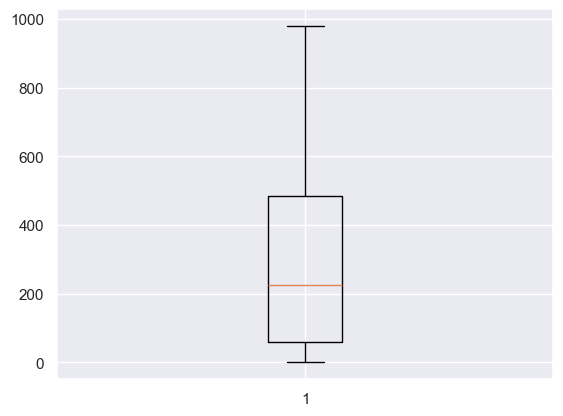

In [37]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [38]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-581.5, 1126.5)

In [39]:
df.block = df.block.clip(lower_bound , upper_bound)

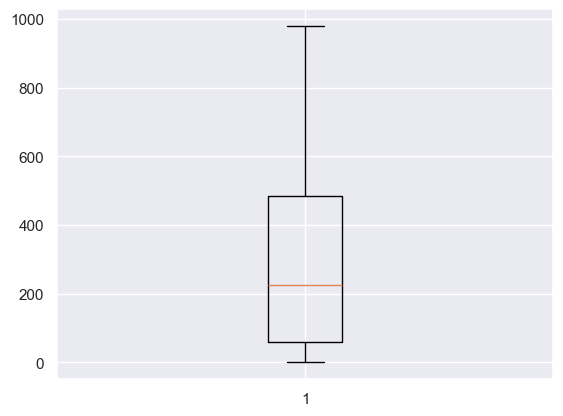

In [55]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

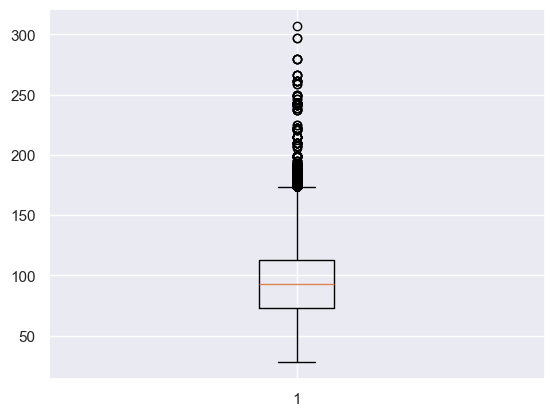

In [40]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [41]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [42]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

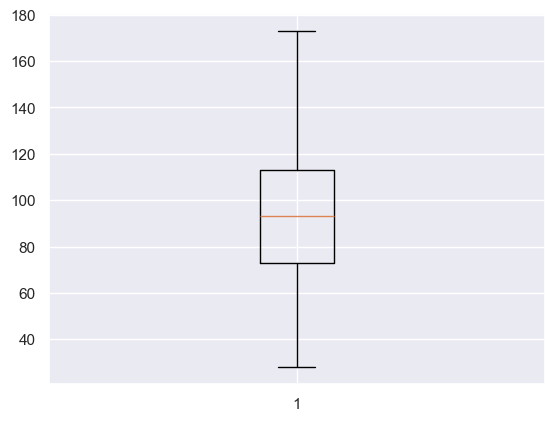

In [56]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

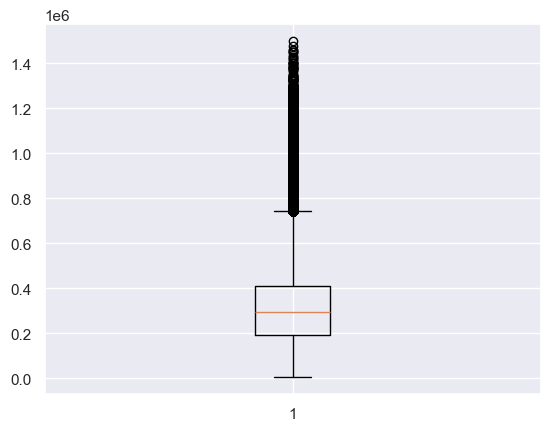

In [43]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [44]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-140500.0, 743500.0)

In [45]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

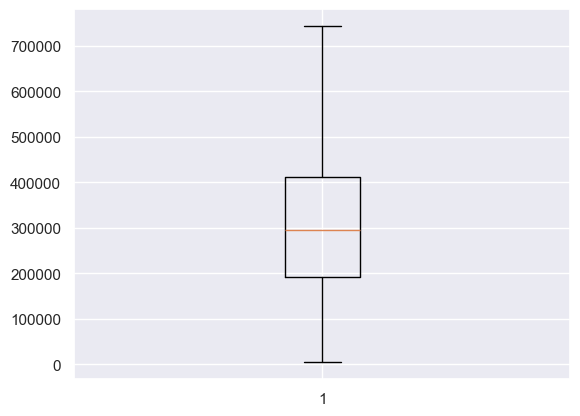

In [57]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

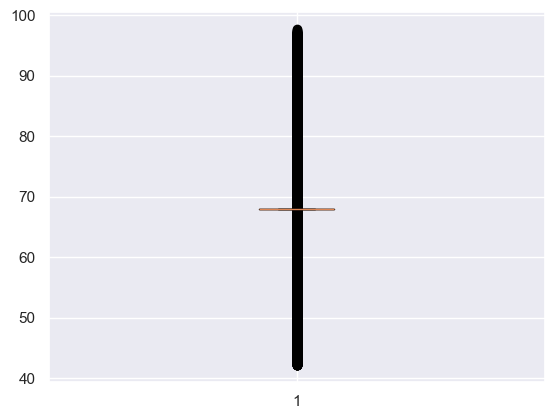

In [46]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [47]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [48]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

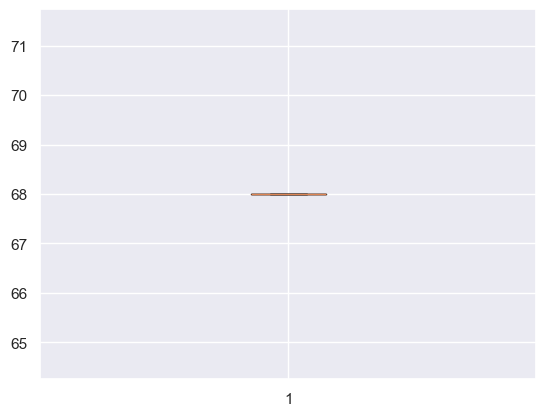

In [58]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

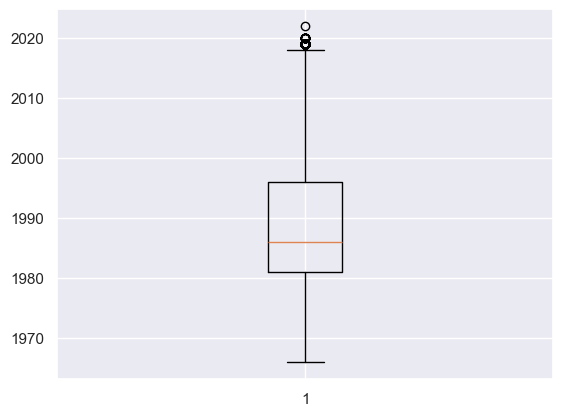

In [49]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [50]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [51]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

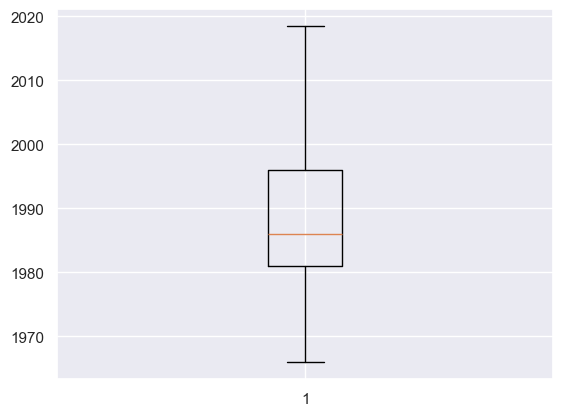

In [59]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

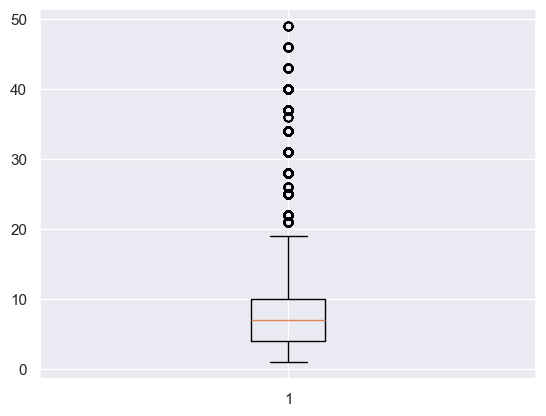

In [52]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [53]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [54]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

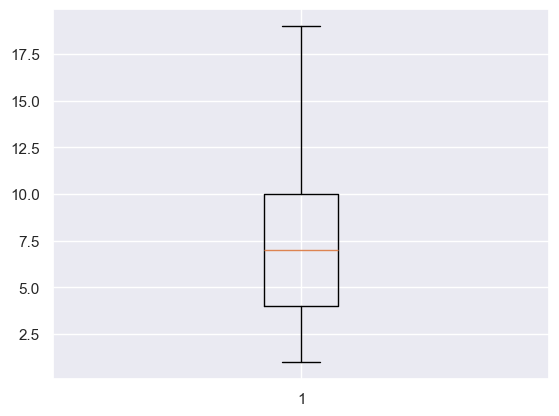

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

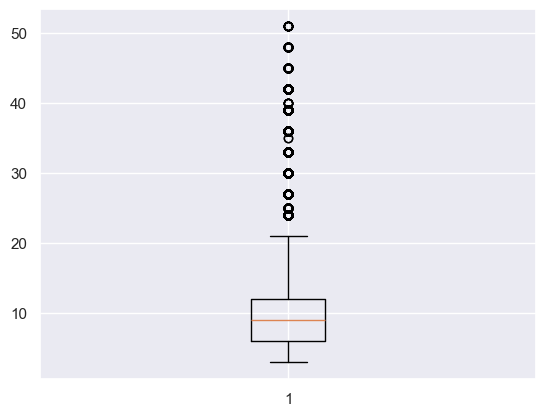

In [62]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [63]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [64]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

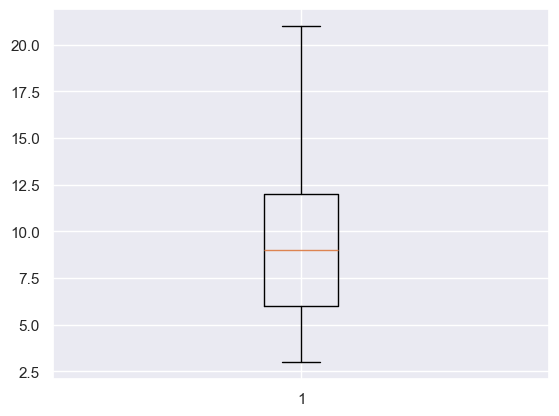

In [65]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

# EDA - EXPLORATARY DATA ANALYSIS

### Categorical Vs Frequency using BarPlot

In [66]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

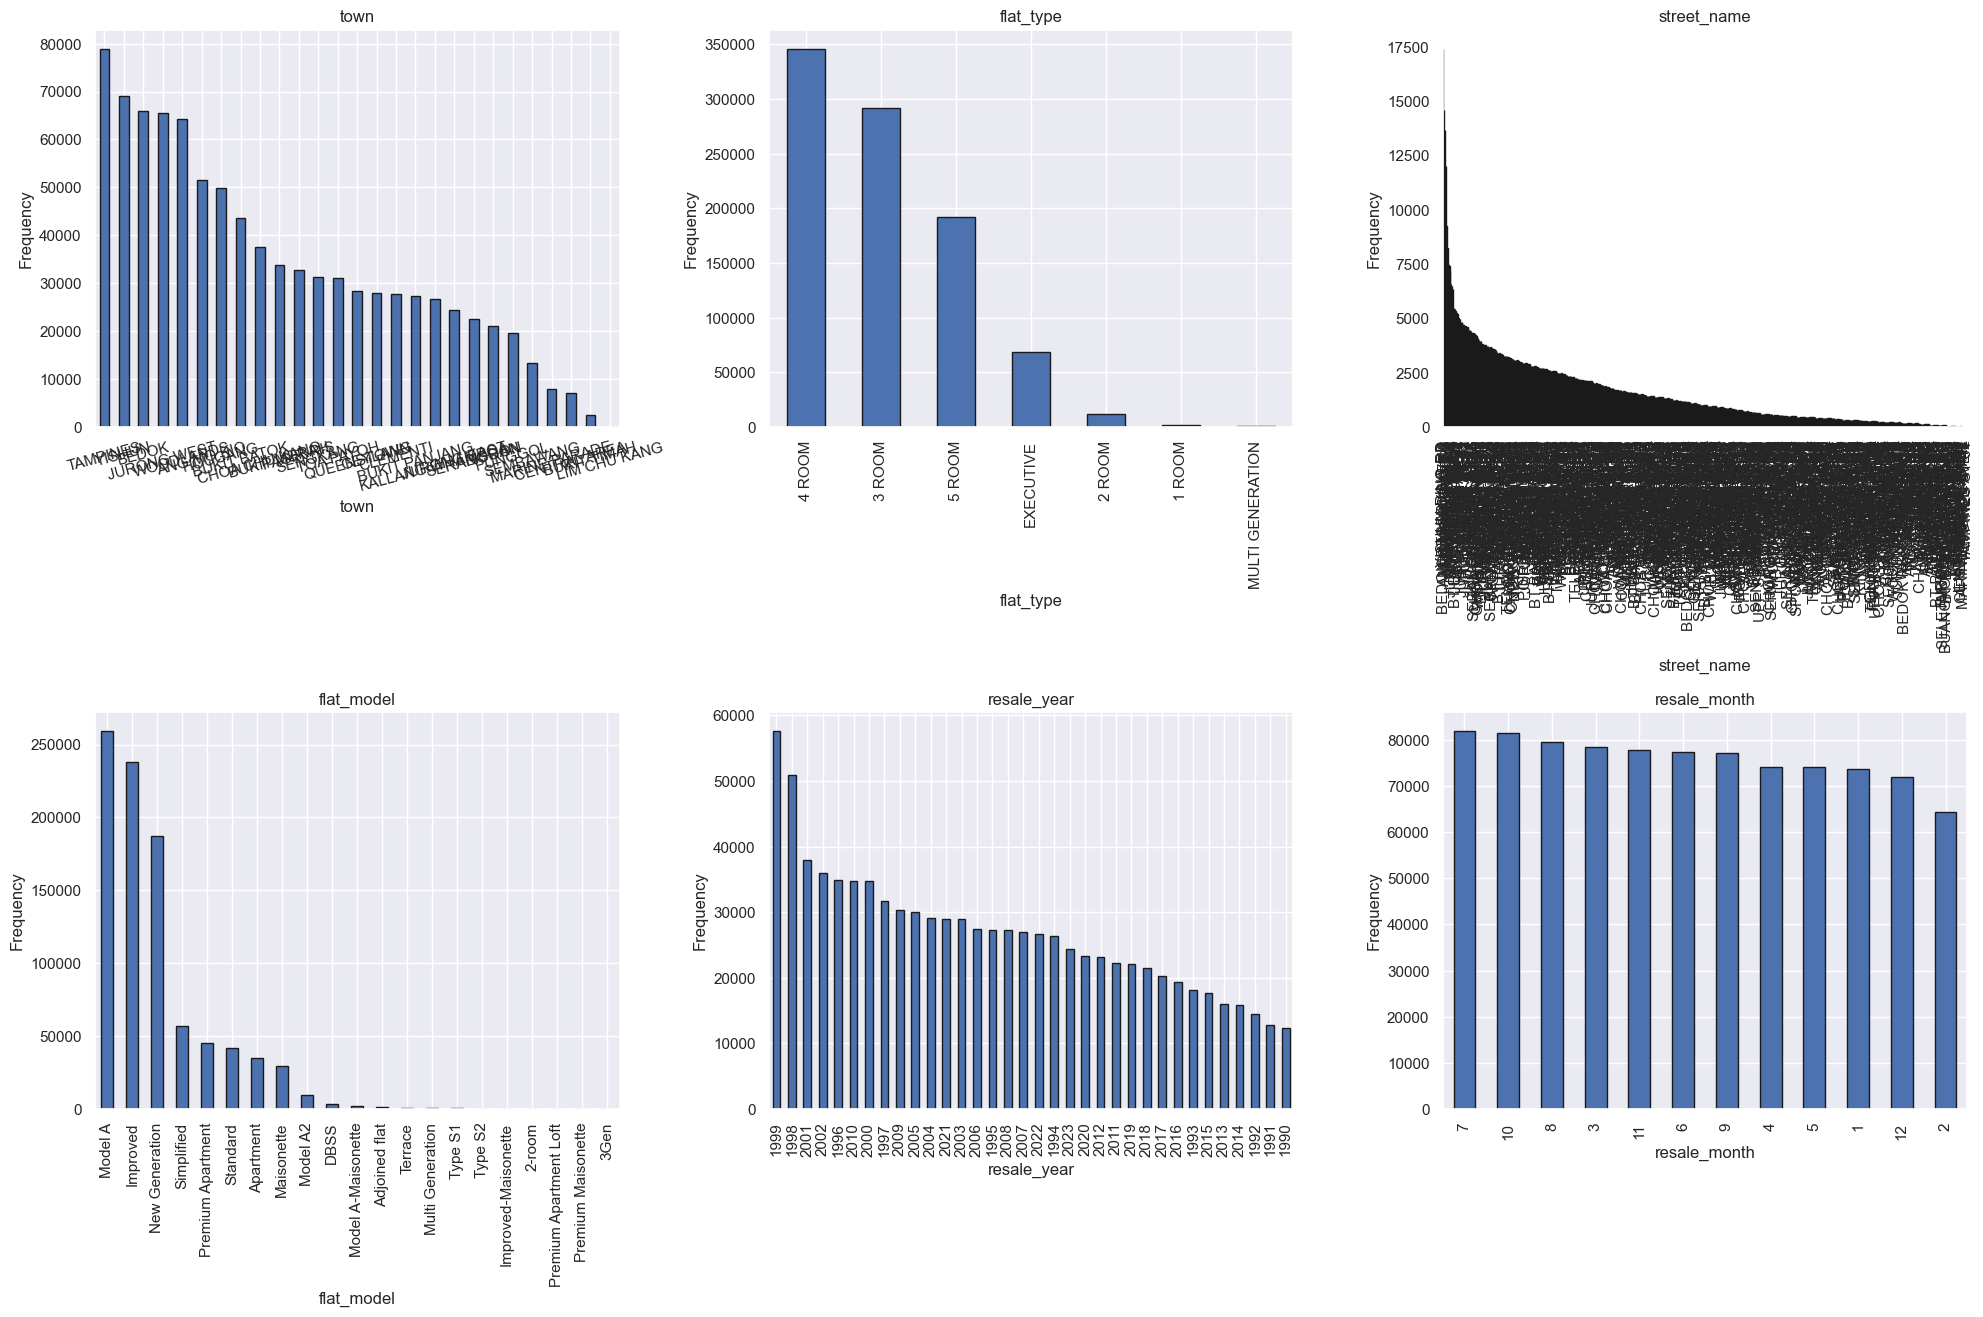

In [67]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature Vs Target (Categorical Data )

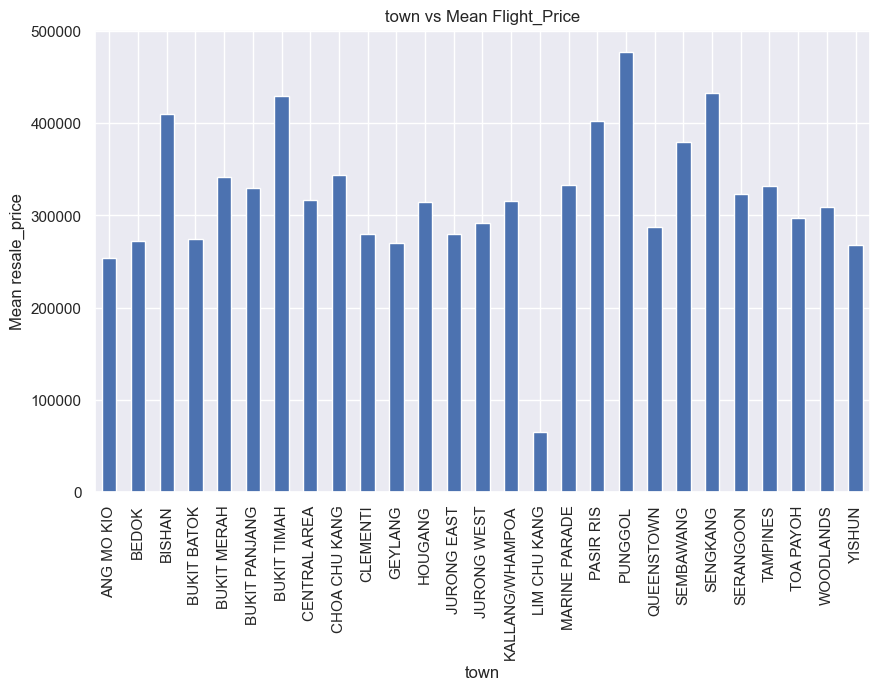

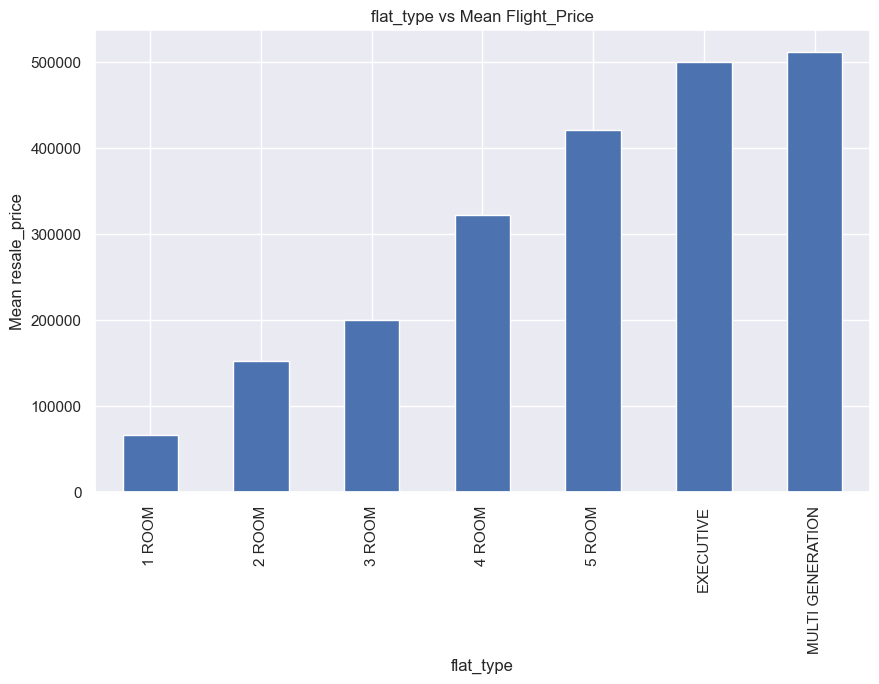

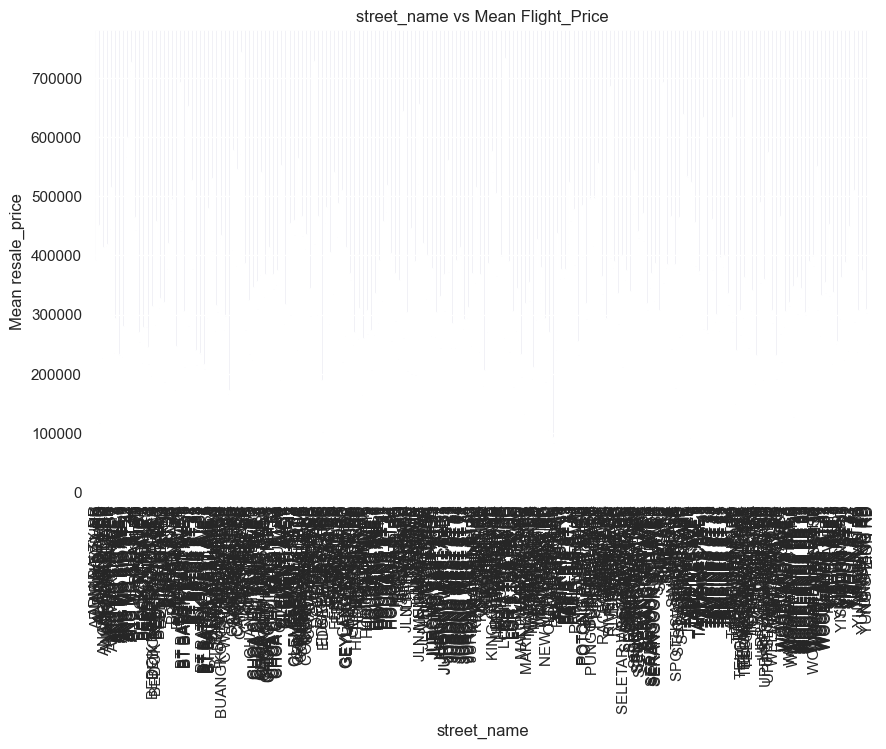

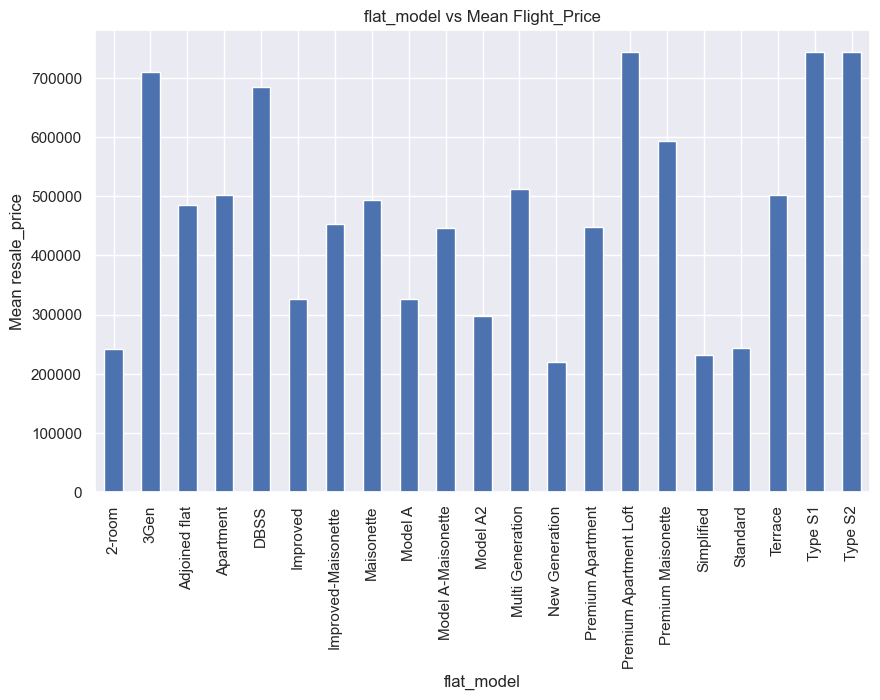

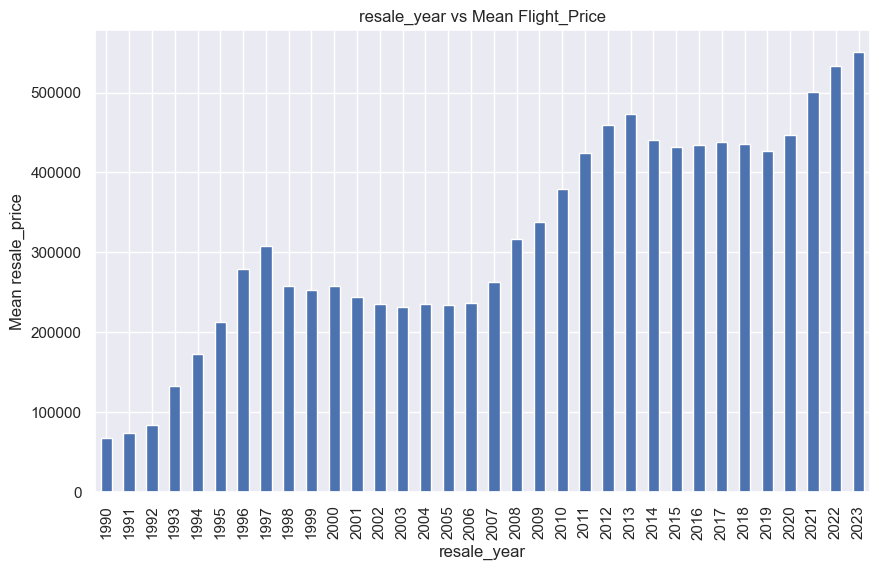

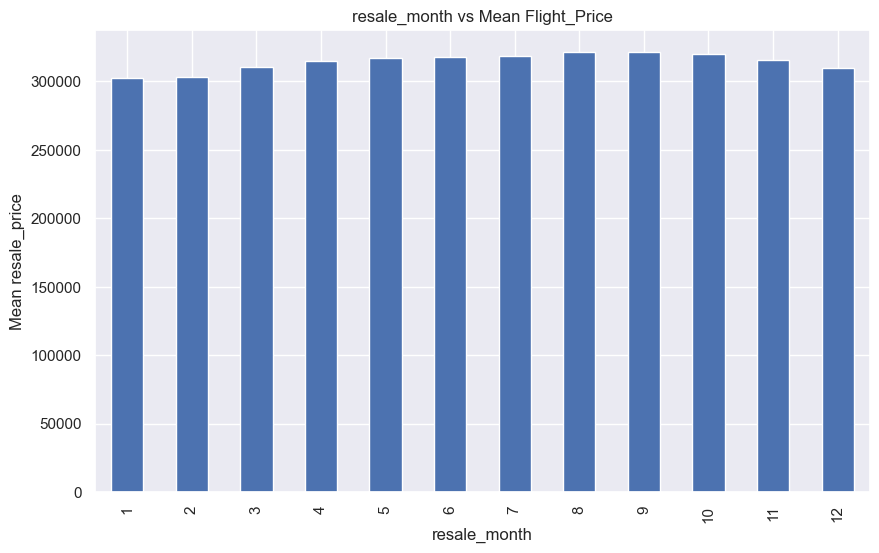

In [68]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

## Feature Vs Target (Condinues Data )

In [69]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [70]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

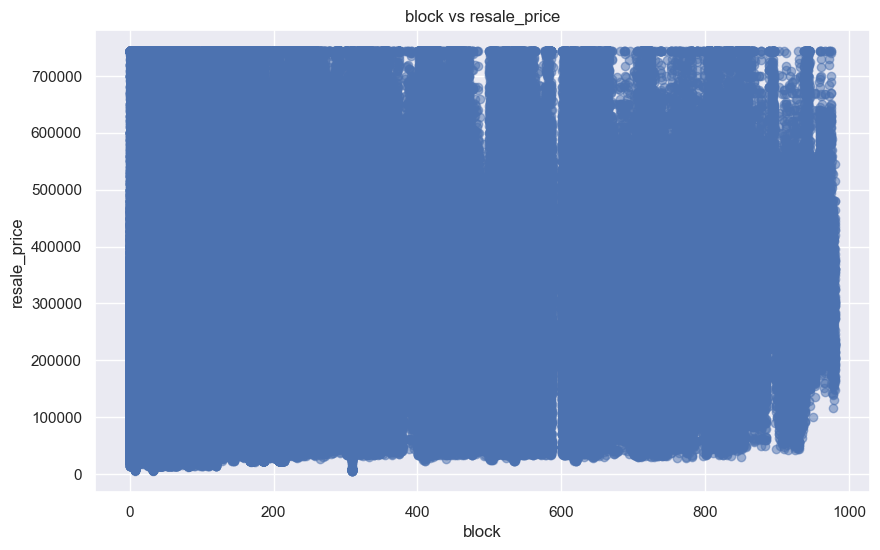

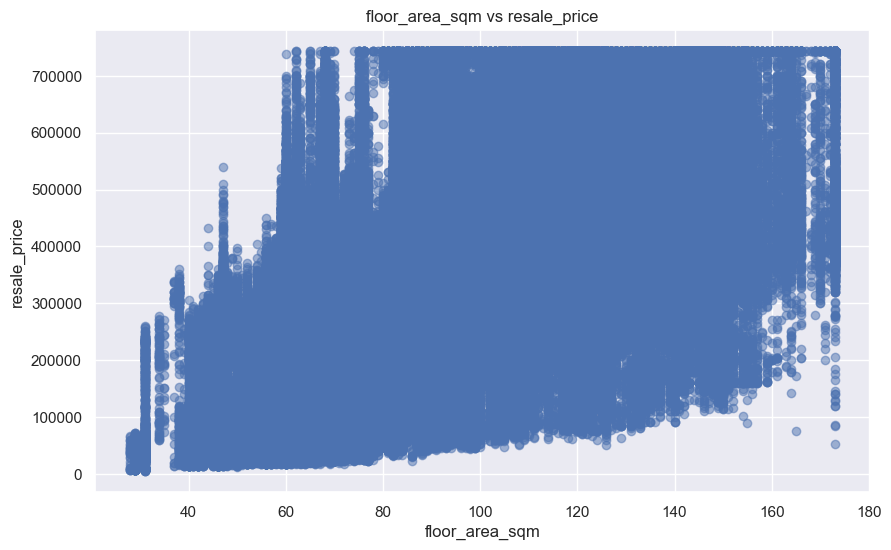

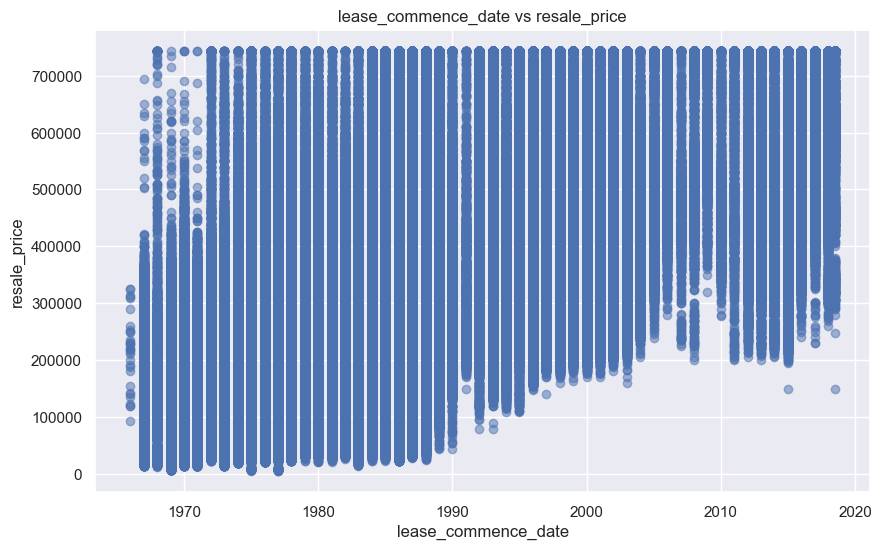

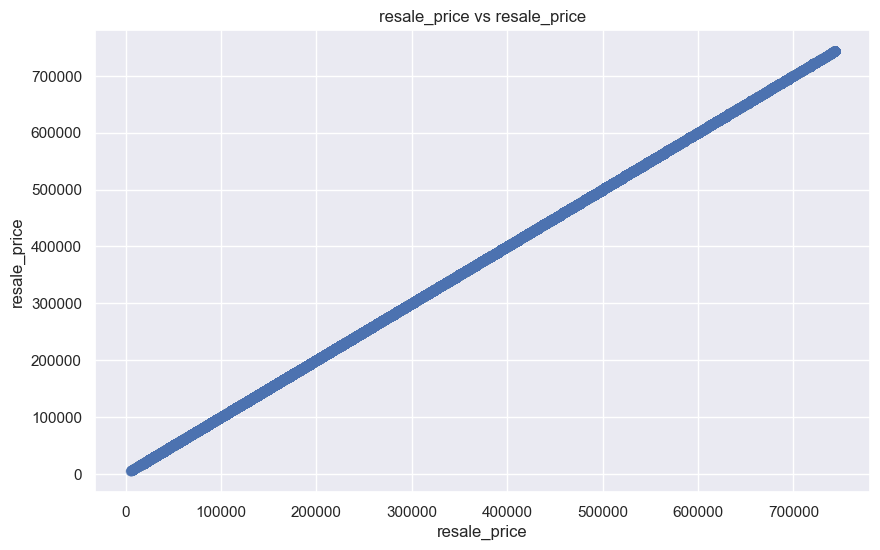

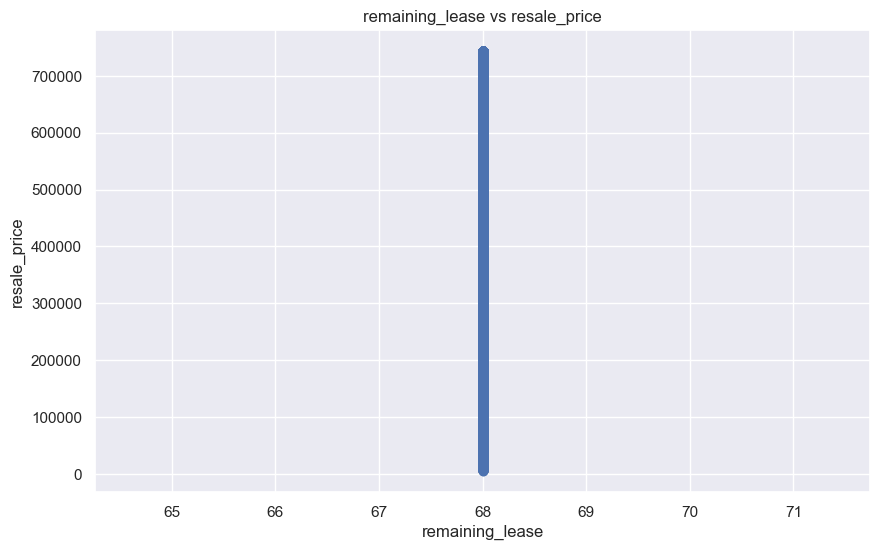

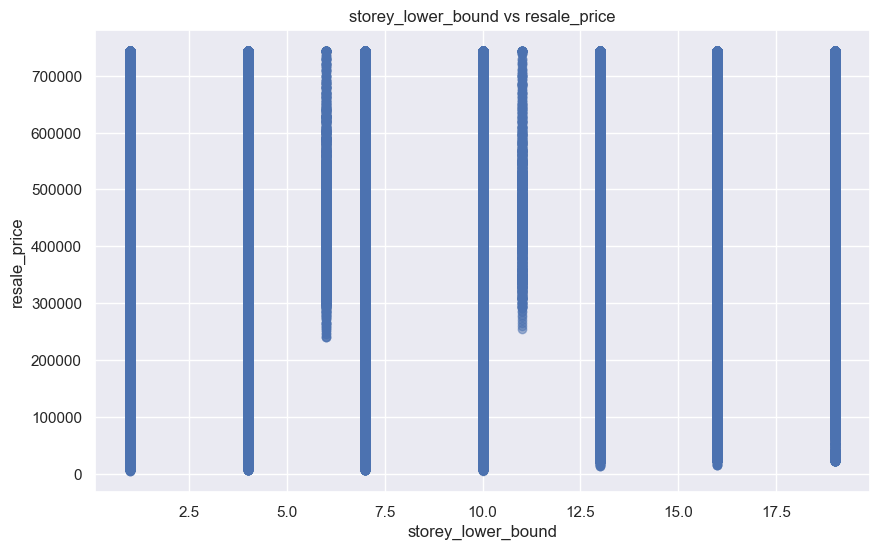

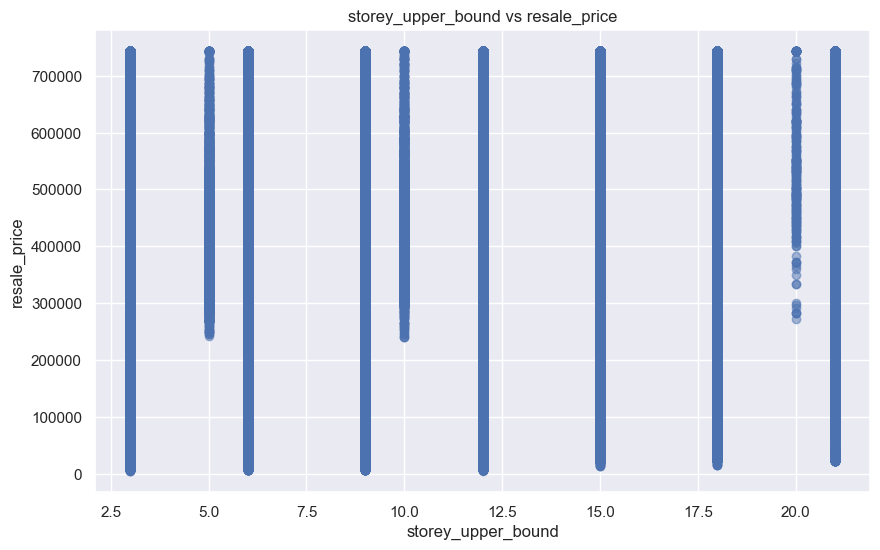

In [71]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

## Encoding Categorical Variables

In [72]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [73]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [74]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [75]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [76]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [77]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [78]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [79]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [ ]:
# save the processed data for the deployment
df1.to_csv('final.csv')

# Correlation

In [80]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.209439,0.052690,0.588117,0.202489,0.163124,0.334928,0.123293,NaN,0.124138,0.005912,-0.019591,-0.019315
flat_type,0.209439,1.000000,0.128045,0.390145,0.954837,0.244067,0.418097,0.609311,NaN,0.103406,0.004030,0.078534,0.078873
block,0.052690,0.128045,1.000000,0.053187,0.187431,-0.000928,0.017880,-0.075934,NaN,-0.111001,-0.001264,-0.122772,-0.122825
street_name,0.588117,0.390145,0.053187,1.000000,0.359597,0.354535,0.740725,0.378378,NaN,0.316653,0.011683,0.079934,0.080608
floor_area_sqm,0.202489,0.954837,0.187431,0.359597,1.000000,0.201820,0.397403,0.584687,NaN,0.065468,0.002903,0.044912,0.045103
flat_model,0.163124,0.244067,-0.000928,0.354535,0.201820,1.000000,0.359043,0.246829,NaN,0.163704,0.003523,0.018586,0.018960
lease_commence_date,0.334928,0.418097,0.017880,0.740725,0.397403,0.359043,1.000000,0.539125,NaN,0.425093,0.014029,0.149780,0.150239
resale_price,0.123293,0.609311,-0.075934,0.378378,0.584687,0.246829,0.539125,1.000000,NaN,0.673494,0.022649,0.207838,0.210676
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124138,0.103406,-0.111001,0.316653,0.065468,0.163704,0.425093,0.673494,NaN,1.000000,-0.005064,0.094593,0.096813


# Heatmap

<Axes: >

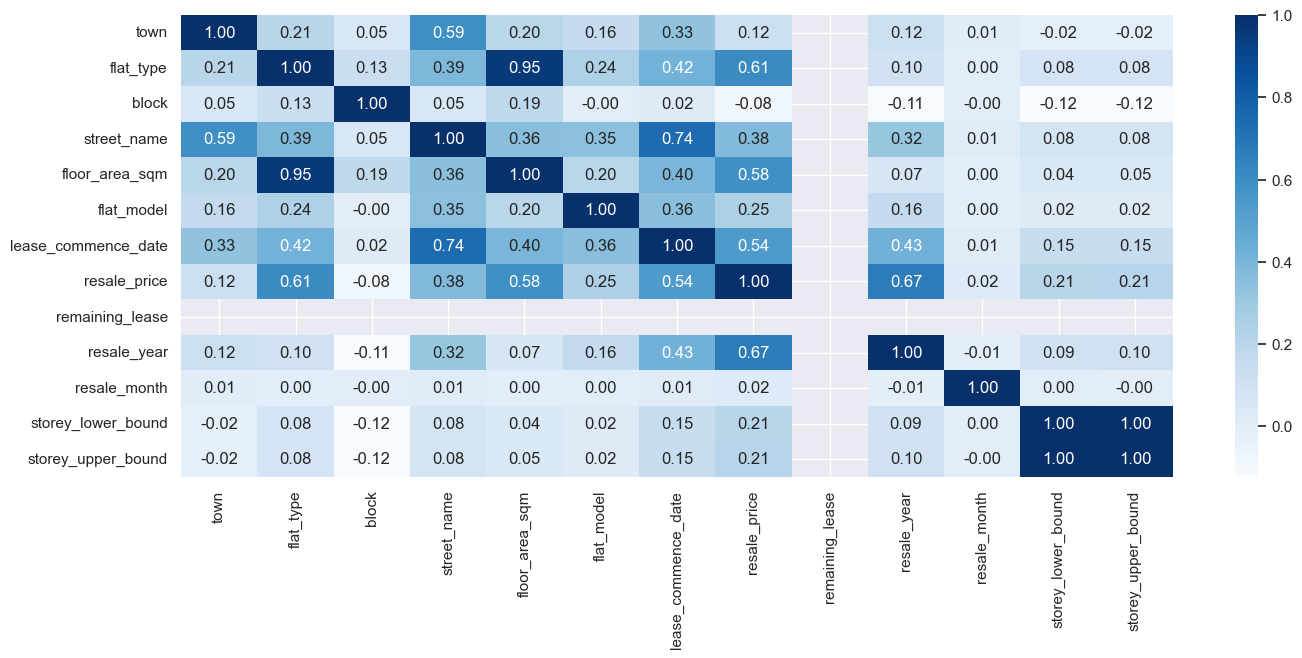

In [82]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

# RIGHT TO MEACHIN LEARNING

## Split

In [83]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [84]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(729305, 12) (182327, 12) (729305,) (182327,)


## Scalling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.30186328, -1.0689509 , -0.53412135, ...,  0.707995  ,
         -0.57860733, -0.58202233],
        [ 0.6866981 , -1.0689509 , -0.16464016, ...,  1.00164974,
          0.0968847 ,  0.09360057],
        [-1.36575427,  2.09127224, -0.21415826, ..., -0.46662397,
         -0.57860733, -0.58202233],
        ...,
        [ 1.45636774,  1.03786453, -0.19511284, ..., -0.17296923,
          1.44786875,  1.44484636],
        [ 0.30186328,  1.03786453, -1.07501134, ..., -1.05393346,
          1.44786875,  1.44484636],
        [-1.23747599, -0.01554318,  0.44100426, ...,  0.707995  ,
         -0.57860733, -0.58202233]]),
 array([[-0.59608463, -1.0689509 ,  1.19139388, ...,  0.12068551,
          0.77237672,  0.76922346],
        [ 1.07153292, -0.01554318,  1.79322922, ..., -0.46662397,
          0.0968847 ,  0.09360057],
        [-1.49403254, -0.01554318,  0.41434066, ..., -1.3475882 ,
          0.77237672,  0.76922346],
        ...,
        [ 0.55841983, -0.01554318,  0.4790951 , ..., -

## Model_Fit

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [87]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[130839.04938486 151541.11268294 218893.79434888 ... 263435.46731856
 311210.51746212 404861.47939923]
201604    152000.0
125436    194000.0
115276    238000.0
205277    110000.0
464539    250000.0
            ...   
140617    198500.0
465280    213000.0
299154    321000.0
746737    295000.0
375637    396000.0
Name: resale_price, Length: 182327, dtype: float64


In [88]:
linear_model.score(X_test, y_test)

0.7875100417544059

In [89]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7877229270061491

## K Nearest Neighbor Regression

In [90]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28587.905292150914
Mean Squared Error (MSE)     : 1736767286.2790987
Root Mean Square Error (RMSE): 41674.5400248053
R-squared (R2) Score         : 0.932025301920288


## Decision Tree Regression

In [91]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17241.99894227001
Mean Squared Error (MSE)     : 648780615.5477654
Root Mean Square Error (RMSE): 25471.17224526122
R-squared (R2) Score         : 0.9746076133456477


## Random Forest Regression

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13729.854372673768
Mean Squared Error (MSE)     : 389208389.5674211
Root Mean Square Error (RMSE): 19728.365101229778
R-squared (R2) Score         : 0.9847669155332738


## Xg Boost Regression

In [93]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16686.07704000774
Mean Squared Error (MSE)     : 544989951.6415381
Root Mean Square Error (RMSE): 23345.01984667261
R-squared (R2) Score         : 0.9786698380882808


## Finalizeing Models

In [94]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.932025301920288
DecisionTreeRegressor 0.9746076133456477
RandomForestRegressor 0.9847669155332738
XGBRegressor 0.9786698380882808

Model: RandomForestRegressor contain Maximum R2_Score: 0.9847669155332738 


## Suggestion

In [95]:
rf_regressor.feature_importances_

array([0.04244413, 0.05198606, 0.01485865, 0.0234359 , 0.28744031,
       0.00785302, 0.0322217 , 0.        , 0.52185074, 0.0067375 ,
       0.00522553, 0.00594645])

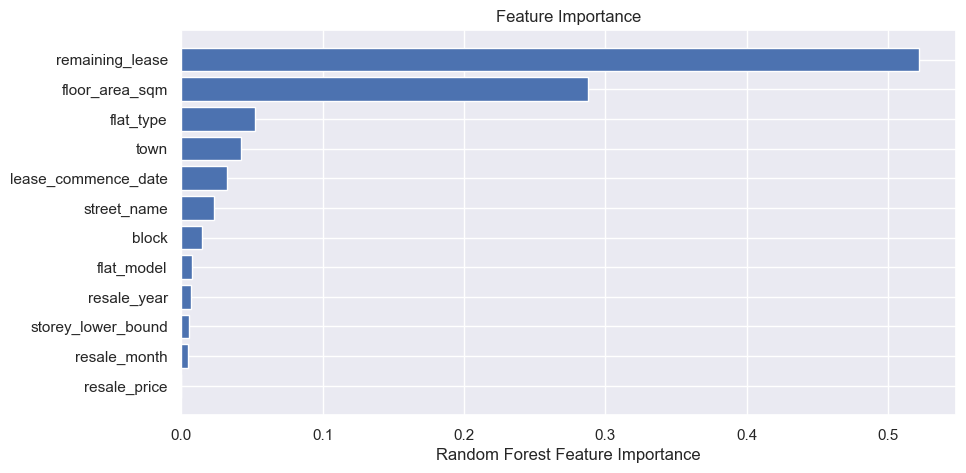

In [96]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


# Save the model

In [103]:
model=rf_regressor.fit(X_train, y_train)

In [106]:
model

RandomForestRegressor(random_state=42)

In [107]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


## Predicting

In [100]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
659544,4,4,2.0,445,92.0,29,1998.0,465000.0,68.0,2012,4,11,15
580014,7,3,8.0,72,56.0,17,1974.0,285000.0,68.0,2009,7,7,9
272973,21,5,850.0,350,136.0,16,1995.0,332888.0,68.0,1999,8,7,9
765866,13,5,2.0,335,112.0,24,2008.0,518000.0,68.0,2017,12,10,12
256561,22,3,119.0,219,64.0,19,1985.0,108500.0,68.0,1999,5,1,3


In [101]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

## Resale Price

In [102]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([461758.88      , 287333.        , 342110.82133333, 504526.9       ,
       109424.66666667])